## Sendy Logit competition by me

<a href="https://colab.research.google.com/github/JOSEPHINEGEND/Sendy-Logistics-Cape-to-Nairo-Datathon/blob/master/Copy_of_DATATHON_CAPE_TO_NAIRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
# Importing necessary libraries for this project analysis

import pandas as pd # for data processing
import numpy as np # for numerical calculations

import seaborn as sns # for visualization
sns.set(style ='white', context = 'notebook', palette = 'deep')
import matplotlib.pyplot as plt # for plotting

import requests
from io import StringIO

import warnings
warnings.filterwarnings('ignore')

# sklearn libraries for data preprocessing and performance measures
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold, learning_curve, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

# import libraies for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# importing algorithms
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
import lightgbm as lgb

In [150]:
# Bias underfitting has not learned well
# Variance overfitting cannot generalize
# STANDARDIZE/ NORMALIZE DATA
# AM AND PM IN TIME
# CROSS VALIDATION STRATEGY
# LGBM
# HYPEROPT FOR BAYESIAN SEARCH
# STACKING MODELS
# MLXNET
# MEAN ENCODING 
# ORDER NUMBER CAN TELL SEASONS
# 

# Load data

In [206]:
# Loading Data

import requests
from io import StringIO

train = 'https://drive.google.com/file/d/1ZP9pFBATu38l97Tut5hKLvpzKRLFXX_P/view?usp=sharing'
#train = pd.read_csv("Train.csv")
test = 'https://drive.google.com/file/d/1_aElMoEIRs55avOafA7U1_YXEuaDBXLh/view?usp=sharing'
#test= pd.read_csv("Test.csv")
submission = 'https://drive.google.com/file/d/1mqXS8euMqF9_bhTEU6O9cLHoX2FI_5HD/view?usp=sharing'

dictionary = 'https://drive.google.com/file/d/1juqltwSs6OXQgJJEhTxD7Gm443fnLpCp/view?usp=sharing'
riders = 'https://drive.google.com/file/d/19-aVgAcKRxX_Tk9StUQMNeAUVi0ZTo9K/view?usp=sharing'
#riders= pd.read_csv("Riders.csv")
# hyperopt

def read_csv(url):
 url = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
 csv_raw = requests.get(url).text
 csv = StringIO(csv_raw)
 return csv

train = pd.read_csv(read_csv(train))
test = pd.read_csv(read_csv(test))
sub = pd.read_csv(read_csv(submission))
dictionary = pd.read_csv(read_csv(dictionary))
riders = pd.read_csv(read_csv(riders))

In [207]:
test_copy = pd.read_csv('Test.csv')

In [208]:
test_copy.head()

Order No       User Id Vehicle Type  Platform Type  \
0  Order_No_19248  User_Id_3355         Bike              3   
1  Order_No_12736  User_Id_3647         Bike              3   
2    Order_No_768  User_Id_2154         Bike              3   
3  Order_No_15332  User_Id_2910         Bike              3   
4  Order_No_21373  User_Id_1205         Bike              3   

  Personal or Business  Placement - Day of Month  \
0             Business                        27   
1             Business                        17   
2             Business                        27   
3             Business                        17   
4             Business                        11   

   Placement - Weekday (Mo = 1) Placement - Time  Confirmation - Day of Month  \
0                             3       4:44:10 PM                           27   
1                             5      12:57:35 PM                           17   
2                             4      11:08:14 AM                           27   
3                             1       1:51:35 PM                           17   
4                             2      11:30:28 AM                           11   

   Confirmation - Weekday (Mo = 1)  ... Pickup - Weekday (Mo = 1)  \
0                                3  ...                         3   
1                                5  ...                         5   
2                                4  ...                         4   
3                                1  ...                         1   
4                                2  ...                         2   

   Pickup - Time  Distance (KM) Temperature  Precipitation in millimeters  \
0     5:06:47 PM              8         NaN                           NaN   
1     1:25:37 PM              5         NaN                           NaN   
2    11:57:54 AM              5        22.8                           NaN   
3     2:16:52 PM              5        24.5                           NaN   
4    11:56:04 AM              6        24.4                           NaN   

   Pickup Lat Pickup Long  Destination Lat  Destination Long      Rider Id  
0   -1.333275   36.870815        -1.305249         36.822390  Rider_Id_192  
1   -1.272639   36.794723        -1.277007         36.823907  Rider_Id_868  
2   -1.290894   36.822971        -1.276574         36.851365   Rider_Id_26  
3   -1.290503   36.809646        -1.303382         36.790658  Rider_Id_685  
4   -1.281081   36.814423        -1.266467         36.792161  Rider_Id_858  

[5 rows x 25 columns]

# EDA

In [209]:
train.head()

Order No       User Id Vehicle Type  Platform Type  \
0   Order_No_4211   User_Id_633         Bike              3   
1  Order_No_25375  User_Id_2285         Bike              3   
2   Order_No_1899   User_Id_265         Bike              3   
3   Order_No_9336  User_Id_1402         Bike              3   
4  Order_No_27883  User_Id_1737         Bike              1   

  Personal or Business  Placement - Day of Month  \
0             Business                         9   
1             Personal                        12   
2             Business                        30   
3             Business                        15   
4             Personal                        13   

   Placement - Weekday (Mo = 1) Placement - Time  Confirmation - Day of Month  \
0                             5       9:35:46 AM                            9   
1                             5      11:16:16 AM                           12   
2                             2      12:39:25 PM                           30   
3                             5       9:25:34 AM                           15   
4                             1       9:55:18 AM                           13   

   Confirmation - Weekday (Mo = 1)  ... Arrival at Destination - Time  \
0                                5  ...                   10:39:55 AM   
1                                5  ...                   12:17:22 PM   
2                                2  ...                    1:00:38 PM   
3                                5  ...                   10:05:27 AM   
4                                1  ...                   10:25:37 AM   

   Distance (KM)  Temperature Precipitation in millimeters  Pickup Lat  \
0              4         20.4                          NaN   -1.317755   
1             16         26.4                          NaN   -1.351453   
2              3          NaN                          NaN   -1.308284   
3              9         19.2                          NaN   -1.281301   
4              9         15.4                          NaN   -1.266597   

   Pickup Long Destination Lat  Destination Long      Rider Id  \
0    36.830370       -1.300406         36.829741  Rider_Id_432   
1    36.899315       -1.295004         36.814358  Rider_Id_856   
2    36.843419       -1.300921         36.828195  Rider_Id_155   
3    36.832396       -1.257147         36.795063  Rider_Id_855   
4    36.792118       -1.295041         36.809817  Rider_Id_770   

  Time from Pickup to Arrival  
0                         745  
1                        1993  
2                         455  
3                        1341  
4                        1214  

[5 rows x 29 columns]

In [210]:
riders.head()

Rider Id  No_Of_Orders   Age  Average_Rating  No_of_Ratings
0  Rider_Id_396          2946  2298            14.0           1159
1  Rider_Id_479           360   951            13.5            176
2  Rider_Id_648          1746   821            14.3            466
3  Rider_Id_753           314   980            12.5             75
4  Rider_Id_335           536  1113            13.7            156

In [211]:
print(f'train: {train.shape} \n  test: {test.shape} \n riders: {riders.shape}')

train: (21201, 29) 
  test: (7068, 25) 
 riders: (960, 5)


In [212]:
train.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [213]:
dictionary

Order No  \
0                                     User Id   
1                                Vehicle Type   
2                               Platform Type   
3                        Personal or Business   
4                    Placement - Day of Month   
5                Placement - Weekday (Mo = 1)   
6                            Placement - Time   
7                 Confirmation - Day of Month   
8             Confirmation - Weekday (Mo = 1)   
9                         Confirmation - Time   
10           Arrival at Pickup - Day of Month   
11       Arrival at Pickup - Weekday (Mo = 1)   
12                   Arrival at Pickup - Time   
13                      Pickup - Day of Month   
14                  Pickup - Weekday (Mo = 1)   
15                              Pickup - Time   
16      Arrival at Destination - Day of Month   
17  Arrival at Destination - Weekday (Mo = 1)   
18              Arrival at Destination - Time   
19                              Distance (KM)   
20                                Temperature   
21               Precipitation in millimeters   
22                                 Pickup Lat   
23                                Pickup Long   
24                            Destination Lat   
25                           Destination Long   
26                                   Rider Id   
27                Time from Pickup to Arrival   
28                                        NaN   
29                              Rider Metrics   
30                                   Rider Id   
31                               No_Of_Orders   
32                                        Age   
33                             Average_Rating   
34                              No_of_Ratings   

                  Unique number identifying the order  
0   Unique number identifying the customer on a pl...  
1   For this competition limited to bikes, however...  
2   Platform used to place the order, there are 4 ...  
3                                       Customer type  
4                   Placement - Day of Month i.e 1-31  
5                    Placement - Weekday (Monday = 1)  
6   Placement - Time - Time of day the order was p...  
7                Confirmation - Day of Month i.e 1-31  
8                 Confirmation - Weekday (Monday = 1)  
9   Confirmation - Time - Time of day the order wa...  
10          Arrival at Pickup - Day of Month i.e 1-31  
11           Arrival at Pickup - Weekday (Monday = 1)  
12  Time of day the the rider arrived at the locat...  
13                     Pickup - Day of Month i.e 1-31  
14                      Pickup - Weekday (Monday = 1)  
15  Pickup - Time - Time of day the the rider pick...  
16        Arrival at Delivery - Day of Month i.e 1-31  
17         Arrival at Delivery - Weekday (Monday = 1)  
18  Arrival at Delivery Time - Time of day the rid...  
19            The distance from Pickup to Destination  
20  Temperature at the time of order placement in ...  
21   Precipitation at the time of order placement ...  
22                       Latitude of pick up location  
23                      Longitude of pick up location  
24                      Latitude of delivery location  
25                     Longitude of delivery location  
26             ID of the Rider who accepted the order  
27  Time in seconds between 'Pickup' and 'Arrival ...  
28                                                NaN  
29                                                NaN  
30  Unique number identifying the rider (same as i...  
31           Number of Orders the rider has delivered  
32  Number of days since the rider delivered the f...  
33                        Average rating of the rider  
34   Number of ratings the rider has received. Rat...

In [214]:
# checking for columns in train set and not in test set
for col in train.columns:
  if col not in test.columns:
    print(col)

Arrival at Destination - Day of Month
Arrival at Destination - Weekday (Mo = 1)
Arrival at Destination - Time
Time from Pickup to Arrival


# Cleaning & Preprocessing

In [215]:
train.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [216]:
test.isnull().sum()

Order No                                   0
User Id                                    0
Vehicle Type                               0
Platform Type                              0
Personal or Business                       0
Placement - Day of Month                   0
Placement - Weekday (Mo = 1)               0
Placement - Time                           0
Confirmation - Day of Month                0
Confirmation - Weekday (Mo = 1)            0
Confirmation - Time                        0
Arrival at Pickup - Day of Month           0
Arrival at Pickup - Weekday (Mo = 1)       0
Arrival at Pickup - Time                   0
Pickup - Day of Month                      0
Pickup - Weekday (Mo = 1)                  0
Pickup - Time                              0
Distance (KM)                              0
Temperature                             1437
Precipitation in millimeters            6869
Pickup Lat                                 0
Pickup Long                                0
Destinatio

Creating clusters

In [217]:
# from sklearn.cluster import KMeans

# sns.set(style = 'darkgrid')

# K_clusters = range(1,100)

# kmeans = [KMeans(n_clusters=i) for i in K_clusters]

# Y_axis = train[['Destination Lat']]
# X_axis = train[['Destination Long']]

# score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# # Visualize
# plt.plot(K_clusters, score)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Score')
# plt.xlim(1,40)
# plt.title('Elbow Curve')
# plt.show()


In [218]:
# TRAIN DATA

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 15, init ='k-means++')

kmeans.fit(train[['Destination Lat', 'Destination Long']]) # Compute k-means clustering.

train['Destination_cluster_label'] = kmeans.fit_predict(train[['Destination Lat', 'Destination Long']])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(train[['Destination Lat', 'Destination Long']]) # Labels of each point

train['Destination_cluster_label'] = train['Destination_cluster_label'].astype('category')

train.head(3)

Order No       User Id Vehicle Type  Platform Type  \
0   Order_No_4211   User_Id_633         Bike              3   
1  Order_No_25375  User_Id_2285         Bike              3   
2   Order_No_1899   User_Id_265         Bike              3   

  Personal or Business  Placement - Day of Month  \
0             Business                         9   
1             Personal                        12   
2             Business                        30   

   Placement - Weekday (Mo = 1) Placement - Time  Confirmation - Day of Month  \
0                             5       9:35:46 AM                            9   
1                             5      11:16:16 AM                           12   
2                             2      12:39:25 PM                           30   

   Confirmation - Weekday (Mo = 1)  ... Distance (KM)  Temperature  \
0                                5  ...             4         20.4   
1                                5  ...            16         26.4   
2                                2  ...             3          NaN   

   Precipitation in millimeters Pickup Lat  Pickup Long  Destination Lat  \
0                           NaN  -1.317755    36.830370        -1.300406   
1                           NaN  -1.351453    36.899315        -1.295004   
2                           NaN  -1.308284    36.843419        -1.300921   

  Destination Long      Rider Id  Time from Pickup to Arrival  \
0        36.829741  Rider_Id_432                          745   
1        36.814358  Rider_Id_856                         1993   
2        36.828195  Rider_Id_155                          455   

  Destination_cluster_label  
0                         1  
1                         1  
2                         1  

[3 rows x 30 columns]

In [219]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 15, init ='k-means++')

kmeans.fit(test[['Destination Lat', 'Destination Long']]) # Compute k-means clustering.

test['Destination_cluster_label'] = kmeans.fit_predict(test[['Destination Lat', 'Destination Long']])

centers2 = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels2 = kmeans.predict(test[['Destination Lat', 'Destination Long']]) # Labels of each point

test['Destination_cluster_label'] = test['Destination_cluster_label'].astype('category')

test.head(3)

Order No       User Id Vehicle Type  Platform Type  \
0  Order_No_19248  User_Id_3355         Bike              3   
1  Order_No_12736  User_Id_3647         Bike              3   
2    Order_No_768  User_Id_2154         Bike              3   

  Personal or Business  Placement - Day of Month  \
0             Business                        27   
1             Business                        17   
2             Business                        27   

   Placement - Weekday (Mo = 1) Placement - Time  Confirmation - Day of Month  \
0                             3       4:44:10 PM                           27   
1                             5      12:57:35 PM                           17   
2                             4      11:08:14 AM                           27   

   Confirmation - Weekday (Mo = 1)  ... Pickup - Time  Distance (KM)  \
0                                3  ...    5:06:47 PM              8   
1                                5  ...    1:25:37 PM              5   
2                                4  ...   11:57:54 AM              5   

   Temperature Precipitation in millimeters  Pickup Lat  Pickup Long  \
0          NaN                          NaN   -1.333275    36.870815   
1          NaN                          NaN   -1.272639    36.794723   
2         22.8                          NaN   -1.290894    36.822971   

  Destination Lat  Destination Long      Rider Id  Destination_cluster_label  
0       -1.305249         36.822390  Rider_Id_192                          1  
1       -1.277007         36.823907  Rider_Id_868                          6  
2       -1.276574         36.851365   Rider_Id_26                          6  

[3 rows x 26 columns]

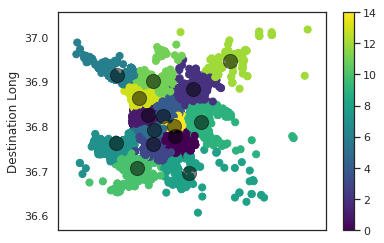

In [220]:
train.plot.scatter(x = 'Destination Lat'	, y = 'Destination Long', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()


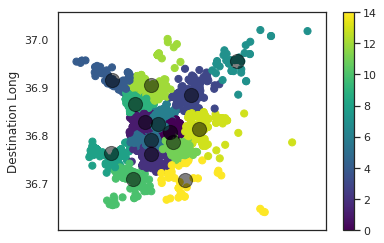

In [221]:
test.plot.scatter(x = 'Destination Lat'	, y = 'Destination Long', c=labels2, s=50, cmap='viridis')
plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=200, alpha=0.5)

plt.show()

Fixing Messy column names

In [222]:
train.columns = train.columns.str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('=', '_')
train.columns = train.columns.str.replace('__', '_')
train.columns = train.columns.str.replace('(', '').str.replace(')', '')
train.columns = train.columns.str.replace('__', '_')
train.columns

Index(['order_no', 'user_id', 'vehicle_type', 'platform_type',
       'personal_or_business', 'placement_day_of_month',
       'placement_weekday_mo_1', 'placement_time', 'confirmation_day_of_month',
       'confirmation_weekday_mo_1', 'confirmation_time',
       'arrival_at_pickup_day_of_month', 'arrival_at_pickup_weekday_mo_1',
       'arrival_at_pickup_time', 'pickup_day_of_month', 'pickup_weekday_mo_1',
       'pickup_time', 'arrival_at_destination_day_of_month',
       'arrival_at_destination_weekday_mo_1', 'arrival_at_destination_time',
       'distance_km', 'temperature', 'precipitation_in_millimeters',
       'pickup_lat', 'pickup_long', 'destination_lat', 'destination_long',
       'rider_id', 'time_from_pickup_to_arrival', 'destination_cluster_label'],
      dtype='object')

In [223]:
test.columns = test.columns.str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('=', '_')
test.columns = test.columns.str.replace('__', '_')
test.columns = test.columns.str.replace('(', '').str.replace(')', '')
test.columns = test.columns.str.replace('__', '_')
test.columns

Index(['order_no', 'user_id', 'vehicle_type', 'platform_type',
       'personal_or_business', 'placement_day_of_month',
       'placement_weekday_mo_1', 'placement_time', 'confirmation_day_of_month',
       'confirmation_weekday_mo_1', 'confirmation_time',
       'arrival_at_pickup_day_of_month', 'arrival_at_pickup_weekday_mo_1',
       'arrival_at_pickup_time', 'pickup_day_of_month', 'pickup_weekday_mo_1',
       'pickup_time', 'distance_km', 'temperature',
       'precipitation_in_millimeters', 'pickup_lat', 'pickup_long',
       'destination_lat', 'destination_long', 'rider_id',
       'destination_cluster_label'],
      dtype='object')

In [224]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 15, init ='k-means++')
kmeans.fit(train[['pickup_lat', 'pickup_long']]) # Compute k-means clustering.
train['pickup_cluster_label'] = kmeans.fit_predict(train[['pickup_lat', 'pickup_long']])
centers1 = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels1 = kmeans.predict(train[['pickup_lat', 'pickup_long']]) # Labels of each point
train['pickup_cluster_label'] = train['pickup_cluster_label'].astype('category')


In [225]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 15, init ='k-means++')
kmeans.fit(test[['pickup_lat', 'pickup_long']]) # Compute k-means clustering.
test['pickup_cluster_label'] = kmeans.fit_predict(test[['pickup_lat', 'pickup_long']])
centers3 = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels3 = kmeans.predict(test[['pickup_lat', 'pickup_long']]) # Labels of each point
test['pickup_cluster_label'] = test['pickup_cluster_label'].astype('category')

In [226]:
# #Forward Fill Temperature Column

train['temperature'].fillna(train['temperature'].median(), inplace= True)

# #Filling in the Precipitation column with median

train['precipitation_in_millimeters'].fillna(0, inplace= True)

In [227]:
# #Forward Fill Temperature Column

test['temperature'].fillna(test['temperature'].median(), inplace= True)

# #Filling in the Precipitation column with median

test['precipitation_in_millimeters'].fillna(0, inplace= True)



# YYYYYYY



In [228]:
train.head()

order_no       user_id vehicle_type  platform_type  \
0   Order_No_4211   User_Id_633         Bike              3   
1  Order_No_25375  User_Id_2285         Bike              3   
2   Order_No_1899   User_Id_265         Bike              3   
3   Order_No_9336  User_Id_1402         Bike              3   
4  Order_No_27883  User_Id_1737         Bike              1   

  personal_or_business  placement_day_of_month  placement_weekday_mo_1  \
0             Business                       9                       5   
1             Personal                      12                       5   
2             Business                      30                       2   
3             Business                      15                       5   
4             Personal                      13                       1   

  placement_time  confirmation_day_of_month  confirmation_weekday_mo_1  ...  \
0     9:35:46 AM                          9                          5  ...   
1    11:16:16 AM                         12                          5  ...   
2    12:39:25 PM                         30                          2  ...   
3     9:25:34 AM                         15                          5  ...   
4     9:55:18 AM                         13                          1  ...   

  temperature  precipitation_in_millimeters  pickup_lat pickup_long  \
0        20.4                           0.0   -1.317755   36.830370   
1        26.4                           0.0   -1.351453   36.899315   
2        23.5                           0.0   -1.308284   36.843419   
3        19.2                           0.0   -1.281301   36.832396   
4        15.4                           0.0   -1.266597   36.792118   

   destination_lat  destination_long      rider_id  \
0        -1.300406         36.829741  Rider_Id_432   
1        -1.295004         36.814358  Rider_Id_856   
2        -1.300921         36.828195  Rider_Id_155   
3        -1.257147         36.795063  Rider_Id_855   
4        -1.295041         36.809817  Rider_Id_770   

   time_from_pickup_to_arrival  destination_cluster_label pickup_cluster_label  
0                          745                          1                    9  
1                         1993                          1                    8  
2                          455                          1                    9  
3                         1341                         14                   10  
4                         1214                          1                    1  

[5 rows x 31 columns]

In [229]:
time_cols = ['placement_time', 'confirmation_time', 'arrival_at_pickup_time', 'pickup_time', 'arrival_at_destination_time']
for col in time_cols:
  train[col] = pd.to_datetime(train[col])
  train[col.split('_')[0] + '_hour'] = train[col].dt.hour
  train[col.split('_')[0] + '_minute'] = train[col].dt.minute
  train[col] = [time.time() for time in train[col]]

In [230]:
test.head(2)

order_no       user_id vehicle_type  platform_type  \
0  Order_No_19248  User_Id_3355         Bike              3   
1  Order_No_12736  User_Id_3647         Bike              3   

  personal_or_business  placement_day_of_month  placement_weekday_mo_1  \
0             Business                      27                       3   
1             Business                      17                       5   

  placement_time  confirmation_day_of_month  confirmation_weekday_mo_1  ...  \
0     4:44:10 PM                         27                          3  ...   
1    12:57:35 PM                         17                          5  ...   

  distance_km  temperature  precipitation_in_millimeters pickup_lat  \
0           8         23.4                           0.0  -1.333275   
1           5         23.4                           0.0  -1.272639   

   pickup_long  destination_lat destination_long      rider_id  \
0    36.870815        -1.305249        36.822390  Rider_Id_192   
1    36.794723        -1.277007        36.823907  Rider_Id_868   

   destination_cluster_label  pickup_cluster_label  
0                          1                     9  
1                          6                    11  

[2 rows x 27 columns]

In [231]:
test.dtypes

order_no                            object
user_id                             object
vehicle_type                        object
platform_type                        int64
personal_or_business                object
placement_day_of_month               int64
placement_weekday_mo_1               int64
placement_time                      object
confirmation_day_of_month            int64
confirmation_weekday_mo_1            int64
confirmation_time                   object
arrival_at_pickup_day_of_month       int64
arrival_at_pickup_weekday_mo_1       int64
arrival_at_pickup_time              object
pickup_day_of_month                  int64
pickup_weekday_mo_1                  int64
pickup_time                         object
distance_km                          int64
temperature                        float64
precipitation_in_millimeters       float64
pickup_lat                         float64
pickup_long                        float64
destination_lat                    float64
destination

# PROBE

In [232]:
time_cols = ['placement_time', 'confirmation_time', 'arrival_at_pickup_time', 'pickup_time']
for col in time_cols:
  test[col] = pd.to_datetime(test[col])
  test[col.split('_')[0] + '_hour'] = test[col].dt.hour
  test[col.split('_')[0] + '_minute'] = test[col].dt.minute
  test[col] = [time.time() for time in test[col]]

In [233]:
hour_cols = ['placement_hour',    'confirmation_hour',    'arrival_hour',    'pickup_hour']

for col in hour_cols:
  train[col.split('_')[0] + '_ap'] = train[col].apply(lambda x: 1 if( x >= 7 & x <= 17) else 0)

In [234]:
hour_cols = ['placement_hour',    'confirmation_hour',    'arrival_hour',    'pickup_hour']

for col in hour_cols:
  test[col.split('_')[0] + '_ap'] = test[col].apply(lambda x: 1 if( x >= 7 & x <= 17) else 0)

In [235]:
train.head()

order_no       user_id vehicle_type  platform_type  \
0   Order_No_4211   User_Id_633         Bike              3   
1  Order_No_25375  User_Id_2285         Bike              3   
2   Order_No_1899   User_Id_265         Bike              3   
3   Order_No_9336  User_Id_1402         Bike              3   
4  Order_No_27883  User_Id_1737         Bike              1   

  personal_or_business  placement_day_of_month  placement_weekday_mo_1  \
0             Business                       9                       5   
1             Personal                      12                       5   
2             Business                      30                       2   
3             Business                      15                       5   
4             Personal                      13                       1   

  placement_time  confirmation_day_of_month  confirmation_weekday_mo_1  ...  \
0       09:35:46                          9                          5  ...   
1       11:16:16                         12                          5  ...   
2       12:39:25                         30                          2  ...   
3       09:25:34                         15                          5  ...   
4       09:55:18                         13                          1  ...   

  confirmation_hour  confirmation_minute  arrival_hour arrival_minute  \
0                 9                   40            10             39   
1                11                   23            12             17   
2                12                   42            13              0   
3                 9                   26            10              5   
4                 9                   56            10             25   

   pickup_hour  pickup_minute placement_ap  confirmation_ap  arrival_ap  \
0           10             27            1                1           1   
1           11             44            1                1           1   
2           12             53            1                1           1   
3            9             43            1                1           1   
4           10              5            1                1           1   

  pickup_ap  
0         1  
1         1  
2         1  
3         1  
4         1  

[5 rows x 43 columns]

In [236]:
test.head()

order_no       user_id vehicle_type  platform_type  \
0  Order_No_19248  User_Id_3355         Bike              3   
1  Order_No_12736  User_Id_3647         Bike              3   
2    Order_No_768  User_Id_2154         Bike              3   
3  Order_No_15332  User_Id_2910         Bike              3   
4  Order_No_21373  User_Id_1205         Bike              3   

  personal_or_business  placement_day_of_month  placement_weekday_mo_1  \
0             Business                      27                       3   
1             Business                      17                       5   
2             Business                      27                       4   
3             Business                      17                       1   
4             Business                      11                       2   

  placement_time  confirmation_day_of_month  confirmation_weekday_mo_1  ...  \
0       16:44:10                         27                          3  ...   
1       12:57:35                         17                          5  ...   
2       11:08:14                         27                          4  ...   
3       13:51:35                         17                          1  ...   
4       11:30:28                         11                          2  ...   

  confirmation_hour  confirmation_minute  arrival_hour arrival_minute  \
0                16                   44            16             53   
1                12                   59            13             20   
2                11                   25            11             33   
3                13                   53            14              2   
4                11                   34            11             47   

   pickup_hour  pickup_minute placement_ap  confirmation_ap  arrival_ap  \
0           17              6            1                1           1   
1           13             25            1                1           1   
2           11             57            1                1           1   
3           14             16            1                1           1   
4           11             56            1                1           1   

   pickup_ap  
0          1  
1          1  
2          1  
3          1  
4          1  

[5 rows x 39 columns]

In [237]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['personal_or_business'] = le.fit_transform(train['personal_or_business'])

In [238]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
test['personal_or_business'] = le.fit_transform(test['personal_or_business'])

In [239]:
cols_to_drop = ['user_id','vehicle_type', 'confirmation_time', 'arrival_at_pickup_time','pickup_time','placement_time',
                'arrival_at_destination_day_of_month', 'arrival_at_destination_weekday_mo_1', 'arrival_at_destination_time','rider_id', 'order_no']

train.drop(cols_to_drop, inplace = True, axis = 1)
               
cols_to_category = ['platform_type']

In [240]:
# checking for columns in train set and not in test set
for col in train.columns:
  if col not in test.columns:
    print(col)

time_from_pickup_to_arrival


In [241]:
cols_to_drop = ['user_id','vehicle_type', 'confirmation_time', 'arrival_at_pickup_time','pickup_time','placement_time','rider_id','order_no']

test.drop(cols_to_drop, inplace = True, axis = 1)
               
cols_to_category = ['platform_type']

In [242]:

train['distance_km']=train['distance_km'].astype(int)
train['platform_type'] = train['platform_type'].astype('category')

In [243]:

test['distance_km']=test['distance_km'].astype(int)
test['platform_type'] = test['platform_type'].astype('category')

In [244]:
train.dtypes

platform_type                     category
personal_or_business                 int64
placement_day_of_month               int64
placement_weekday_mo_1               int64
confirmation_day_of_month            int64
confirmation_weekday_mo_1            int64
arrival_at_pickup_day_of_month       int64
arrival_at_pickup_weekday_mo_1       int64
pickup_day_of_month                  int64
pickup_weekday_mo_1                  int64
distance_km                          int64
temperature                        float64
precipitation_in_millimeters       float64
pickup_lat                         float64
pickup_long                        float64
destination_lat                    float64
destination_long                   float64
time_from_pickup_to_arrival          int64
destination_cluster_label         category
pickup_cluster_label              category
placement_hour                       int64
placement_minute                     int64
confirmation_hour                    int64
confirmatio

In [245]:
test.dtypes

platform_type                     category
personal_or_business                 int64
placement_day_of_month               int64
placement_weekday_mo_1               int64
confirmation_day_of_month            int64
confirmation_weekday_mo_1            int64
arrival_at_pickup_day_of_month       int64
arrival_at_pickup_weekday_mo_1       int64
pickup_day_of_month                  int64
pickup_weekday_mo_1                  int64
distance_km                          int64
temperature                        float64
precipitation_in_millimeters       float64
pickup_lat                         float64
pickup_long                        float64
destination_lat                    float64
destination_long                   float64
destination_cluster_label         category
pickup_cluster_label              category
placement_hour                       int64
placement_minute                     int64
confirmation_hour                    int64
confirmation_minute                  int64
arrival_hou

In [246]:
train.head()

platform_type  personal_or_business  placement_day_of_month  \
0             3                     0                       9   
1             3                     1                      12   
2             3                     0                      30   
3             3                     0                      15   
4             1                     1                      13   

   placement_weekday_mo_1  confirmation_day_of_month  \
0                       5                          9   
1                       5                         12   
2                       2                         30   
3                       5                         15   
4                       1                         13   

   confirmation_weekday_mo_1  arrival_at_pickup_day_of_month  \
0                          5                               9   
1                          5                              12   
2                          2                              30   
3                          5                              15   
4                          1                              13   

   arrival_at_pickup_weekday_mo_1  pickup_day_of_month  pickup_weekday_mo_1  \
0                               5                    9                    5   
1                               5                   12                    5   
2                               2                   30                    2   
3                               5                   15                    5   
4                               1                   13                    1   

   ...  confirmation_hour  confirmation_minute  arrival_hour  arrival_minute  \
0  ...                  9                   40            10              39   
1  ...                 11                   23            12              17   
2  ...                 12                   42            13               0   
3  ...                  9                   26            10               5   
4  ...                  9                   56            10              25   

   pickup_hour  pickup_minute  placement_ap  confirmation_ap arrival_ap  \
0           10             27             1                1          1   
1           11             44             1                1          1   
2           12             53             1                1          1   
3            9             43             1                1          1   
4           10              5             1                1          1   

  pickup_ap  
0         1  
1         1  
2         1  
3         1  
4         1  

[5 rows x 32 columns]

In [247]:
test.head()

platform_type  personal_or_business  placement_day_of_month  \
0             3                     0                      27   
1             3                     0                      17   
2             3                     0                      27   
3             3                     0                      17   
4             3                     0                      11   

   placement_weekday_mo_1  confirmation_day_of_month  \
0                       3                         27   
1                       5                         17   
2                       4                         27   
3                       1                         17   
4                       2                         11   

   confirmation_weekday_mo_1  arrival_at_pickup_day_of_month  \
0                          3                              27   
1                          5                              17   
2                          4                              27   
3                          1                              17   
4                          2                              11   

   arrival_at_pickup_weekday_mo_1  pickup_day_of_month  pickup_weekday_mo_1  \
0                               3                   27                    3   
1                               5                   17                    5   
2                               4                   27                    4   
3                               1                   17                    1   
4                               2                   11                    2   

   ...  confirmation_hour  confirmation_minute  arrival_hour  arrival_minute  \
0  ...                 16                   44            16              53   
1  ...                 12                   59            13              20   
2  ...                 11                   25            11              33   
3  ...                 13                   53            14               2   
4  ...                 11                   34            11              47   

   pickup_hour  pickup_minute  placement_ap confirmation_ap arrival_ap  \
0           17              6             1               1          1   
1           13             25             1               1          1   
2           11             57             1               1          1   
3           14             16             1               1          1   
4           11             56             1               1          1   

   pickup_ap  
0          1  
1          1  
2          1  
3          1  
4          1  

[5 rows x 31 columns]

# MODELING

In [248]:
X = train.drop('time_from_pickup_to_arrival', axis = 1)

X= pd.get_dummies(X)

y = train.time_from_pickup_to_arrival

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16960, 62) (4241, 62) (16960,) (4241,)


In [250]:
rs = 3
kfold = KFold(n_splits=10, random_state=rs, shuffle=True)

regressors = []
regressors.append(SVR())
regressors.append(GradientBoostingRegressor(random_state=rs))
regressors.append(ExtraTreesRegressor(n_estimators=rs))
regressors.append(RandomForestRegressor(random_state=rs))
regressors.append(XGBRegressor(random_state=rs, objective="reg:squarederror"))
regressors.append(LGBMRegressor(random_state=rs))

cv_results = []
for regressor in regressors:     #scores to be minimised are negated (neg)
    cv_results.append(np.sqrt(abs(cross_val_score(regressor, X_train, y=y_train, scoring='neg_mean_squared_error', cv=kfold))))

cv_means = []
cv_stds = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_stds.append(cv_result.std())
    
cv_res = pd.DataFrame({ 
    "Algorithm": ["SVR", "GBR", "EXR", "RFR", "XGBR", "LGBM"],
    "CrossValMeans": cv_means, "CrossValErrors": cv_stds
                       })
cv_res = cv_res.sort_values("CrossValMeans", ascending=True)
print(cv_res)

  Algorithm  CrossValMeans  CrossValErrors
5      LGBM     427.378829       32.025331
1       GBR     652.643527       24.007965
4      XGBR     655.816039       27.315636
3       RFR     683.806303       31.549214
2       EXR     824.235819       39.332228
0       SVR    1003.931486       26.920961


In [251]:
params = {
    'n_estimators':[75], # [75, 95],
    'num_leaves': [15], #[12,15, 17],
    'reg_alpha': [0.02], #[0.02, 0.05],
    'min_data_in_leaf': [300],  #[250, 280, 300]
    'learning_rate': [0.1], #[0.05, 0.1, 0.25],
    'objective': ['regression'] #['regression', None]
    }

lsearch = GridSearchCV(estimator = LGBMRegressor(random_state=rs), cv=kfold,scoring='neg_mean_squared_error', param_grid=params)
lgbm = lsearch.fit(X_train, y_train)

l_params = lgbm.best_params_
l_score = np.sqrt(abs(lgbm.best_score_))
print(lgbm.best_params_, np.sqrt(abs(lgbm.best_score_)))

#try: RandomSearch, hyperopt (bayesian)

{'learning_rate': 0.1, 'min_data_in_leaf': 300, 'n_estimators': 75, 'num_leaves': 15, 'objective': 'regression', 'reg_alpha': 0.02} 609.9084874417327


Text(0.5, 1.0, ' LGBM feature importance')

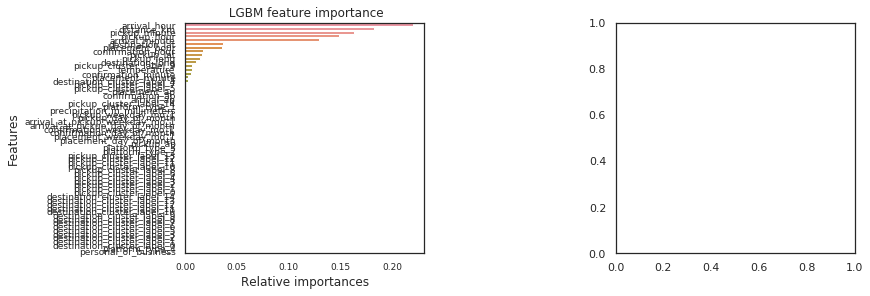

In [252]:
vals = lgbm.best_estimator_.feature_importances_
l_importance = np.array([ val/sum(vals) for val in vals ])

features = X.columns

feats = np.array(features)

fig,axes = plt.subplots(1,2, figsize=(12, 8))
plt.subplots_adjust(top=0.6, bottom=0.2, hspace=.6, wspace=0.8)

indices = np.argsort(l_importance)[::-1]
g = sns.barplot(y=feats[indices], x=l_importance[indices], orient='h', ax=axes[0])
g.set_xlabel("Relative importances", fontsize=12)
g.set_ylabel("Features", fontsize=12)
g.tick_params(labelsize=9)
g.set_title(" LGBM feature importance")


In [253]:
def plot_learning_curve(estimator, title, X, y, ylim=None, n_jobs=-1, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generating a plot of test and training learning curve"""
    plt.figure()
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Trainig examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error', shuffle=True)
    
    #scores - 5 runs, each with 10 fold
    train_scores_mean = -np.mean(train_scores, axis=1) #5 means (each size)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r' )
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    
    plt.legend(loc='best')
    return plt

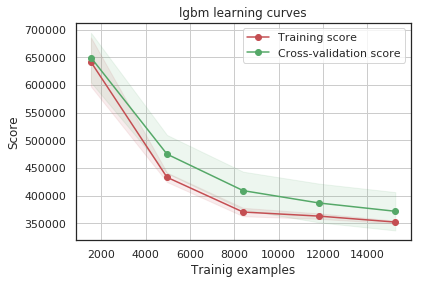

In [254]:
#Learning Curves

g = plot_learning_curve(lgbm.best_estimator_, "lgbm learning curves", X_train, y_train, cv=kfold)



In [255]:
import lightgbm as lgb

In [256]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

lparams = {
           'learning_rate': 0.1, 'min_data_in_leaf': 300, 
           'n_estimators': 75, 'num_leaves': 15, 'random_state':rs,
           'objective': 'regression', 'reg_alpha': 0.02,
          'feature_fraction': 0.9, 'bagging_fraction':0.9}


lgbm = lgb.train(lparams, lgb_train, valid_sets=lgb_eval, num_boost_round=20, early_stopping_rounds=20)

lpred = lgbm.predict(X_test, num_iteration=lgbm.best_iteration)

print("The RMSE of prediction is ", mean_squared_error(y_test, lpred)**0.5)

[1]	valid_0's l2: 897997
Training until validation scores don't improve for 20 rounds
[2]	valid_0's l2: 845230
[3]	valid_0's l2: 801814
[4]	valid_0's l2: 766285
[5]	valid_0's l2: 746261
[6]	valid_0's l2: 718626
[7]	valid_0's l2: 697594
[8]	valid_0's l2: 679766
[9]	valid_0's l2: 664873
[10]	valid_0's l2: 647941
[11]	valid_0's l2: 636010
[12]	valid_0's l2: 626409
[13]	valid_0's l2: 615413
[14]	valid_0's l2: 608782
[15]	valid_0's l2: 601578
[16]	valid_0's l2: 586772
[17]	valid_0's l2: 580249
[18]	valid_0's l2: 569776
[19]	valid_0's l2: 566101
[20]	valid_0's l2: 557253
[21]	valid_0's l2: 549875
[22]	valid_0's l2: 546768
[23]	valid_0's l2: 542565
[24]	valid_0's l2: 536288
[25]	valid_0's l2: 533252
[26]	valid_0's l2: 531400
[27]	valid_0's l2: 526456
[28]	valid_0's l2: 513759
[29]	valid_0's l2: 506505
[30]	valid_0's l2: 497501
[31]	valid_0's l2: 490184
[32]	valid_0's l2: 483971
[33]	valid_0's l2: 478067
[34]	valid_0's l2: 469348
[35]	valid_0's l2: 464481
[36]	valid_0's l2: 459492
[37]	valid_0

# Making a submission

In [257]:
test = pd.get_dummies(test)

In [258]:
lgbm_y = lgbm.predict(test, num_iteration=lgbm.best_iteration)
lgbm_output = pd.DataFrame({"Order_No":test_copy['Order No'], 
                           "Time from Pickup to Arrival": lgbm_y })
lgbm_output.to_csv("submission3_by_mipawa.csv", index=False)

In [259]:
df = pd.read_csv('submission3_by_mipawa.csv')

In [260]:
df

Order_No  Time from Pickup to Arrival
0     Order_No_19248                  2555.461415
1     Order_No_12736                  1175.714348
2       Order_No_768                  1142.139054
3     Order_No_15332                  1373.746360
4     Order_No_21373                  1253.148566
5     Order_No_14573                  2536.296846
6      Order_No_6731                  2335.807493
7     Order_No_18436                  1239.275386
8      Order_No_2288                  1444.776853
9      Order_No_9063                  2230.935107
10     Order_No_4814                  1050.569249
11    Order_No_16747                  2289.992712
12     Order_No_6376                  1603.456584
13     Order_No_1199                  1319.787429
14    Order_No_17119                  2769.606488
15    Order_No_14832                  2520.086361
16    Order_No_12321                  1963.386055
17    Order_No_24820                  1450.690486
18     Order_No_6065                  1355.561973
19    Order_No_13176                   674.545853
20    Order_No_23557                   815.961847
21    Order_No_20488                  1905.361894
22    Order_No_24214                  2586.727545
23    Order_No_21206                  1907.984466
24     Order_No_1930                  1593.963974
25    Order_No_28180                  1740.394725
26    Order_No_13329                   761.524116
27    Order_No_19004                  1167.456631
28    Order_No_27510                  1772.804909
29    Order_No_25394                  1498.414044
...              ...                          ...
7038  Order_No_10317                  1183.775619
7039  Order_No_11143                  2009.004783
7040   Order_No_8996                  2383.571767
7041  Order_No_14381                   577.566125
7042  Order_No_22839                  1174.587216
7043    Order_No_463                   972.133343
7044   Order_No_3700                  1699.767808
7045  Order_No_23416                  2115.443318
7046  Order_No_16891                   729.391638
7047  Order_No_17710                  1454.760688
7048    Order_No_233                  1639.572613
7049  Order_No_15773                   828.025179
7050  Order_No_15488                  1279.838488
7051  Order_No_16865                  2295.372610
7052   Order_No_1301                   830.280183
7053  Order_No_18519                  1063.064393
7054  Order_No_14258                   773.114851
7055   Order_No_8374                  1411.961657
7056  Order_No_25128                  2504.527969
7057  Order_No_11937                  2368.995084
7058  Order_No_25241                  1274.818186
7059   Order_No_5287                  1536.570534
7060   Order_No_7712                  2496.476894
7061    Order_No_294                  2485.404647
7062  Order_No_16972                  1492.961171
7063   Order_No_3612                  1542.345892
7064   Order_No_7657                  2424.244795
7065   Order_No_1969                  1126.274008
7066  Order_No_10591                  2257.208482
7067   Order_No_1603                  2781.198116

[7068 rows x 2 columns]